In [ ]:
#https://research.google.com/colaboratory/local-runtimes.html
#pip install jupyter_http_over_ws
#jupyter serverextension enable --py jupyter_http_over_ws
#jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com'  --port=8889 --NotebookApp.port_retries=0

In [ ]:
#https://www.kaggle.com/c/stanford-covid-vaccine/data
#https://www.kaggle.com/artgor/openvaccine-eda-feature-engineering-and-modelling
#kaggle competitions download -c stanford-covid-vaccine
#kaggle competitions submit -c stanford-covid-vaccine -f submission.csv -m "Message"

In [ ]:
!pip install pathlib
!pip install pandas
!pip install forgi
!pip install numpy
!pip install matplotlib
!pip install pandas_profiling

In [16]:
from pathlib import Path
pathFiles = Path('C:/Users/animeshs/GD/stanford-covid-vaccine')
testFile=pathFiles/'test.json'
trainFile=pathFiles/'train.json'
imgList=list(pathFiles.rglob("*.npy*"))
print(imgList)

[WindowsPath('C:/Users/animeshs/GD/stanford-covid-vaccine/bpps/id_00073f8be.npy'), WindowsPath('C:/Users/animeshs/GD/stanford-covid-vaccine/bpps/id_000ae4237.npy'), WindowsPath('C:/Users/animeshs/GD/stanford-covid-vaccine/bpps/id_00131c573.npy'), WindowsPath('C:/Users/animeshs/GD/stanford-covid-vaccine/bpps/id_00181fd34.npy'), WindowsPath('C:/Users/animeshs/GD/stanford-covid-vaccine/bpps/id_001f94081.npy'), WindowsPath('C:/Users/animeshs/GD/stanford-covid-vaccine/bpps/id_0020473f7.npy'), WindowsPath('C:/Users/animeshs/GD/stanford-covid-vaccine/bpps/id_002852873.npy'), WindowsPath('C:/Users/animeshs/GD/stanford-covid-vaccine/bpps/id_0031191b7.npy'), WindowsPath('C:/Users/animeshs/GD/stanford-covid-vaccine/bpps/id_003ab2445.npy'), WindowsPath('C:/Users/animeshs/GD/stanford-covid-vaccine/bpps/id_0049f53ba.npy'), WindowsPath('C:/Users/animeshs/GD/stanford-covid-vaccine/bpps/id_0051b1d76.npy'), WindowsPath('C:/Users/animeshs/GD/stanford-covid-vaccine/bpps/id_00583aef6.npy'), WindowsPath('C:

In [17]:
import forgi
bg, = forgi.load_rna('(((((((((...((((((.........))))))........((((((.......))))))..)))))))))') #bg.pairing_partner(7) #71
bg.pairing_partner(9)

63

In [ ]:
import pandas as pd
#train
dfTrain=pd.read_json(trainFile,lines=True)
train_data = []
#dfTrain.columns.get_loc("mol")
dfTrain.loc[dfTrain['id'] == "mol_id"]
for mol_id in dfTrain['id'].unique():
    sample_data = dfTrain.loc[dfTrain['id'] == mol_id]
    bg, = forgi.load_rna(sample_data['structure'].values[0])
    for i in range(68): #calculate data only for 68 positions
    #for i in range(int(sample_data['sequence'].apply(len)-1)):
        #print(i)
        sample_tuple = (sample_data['id'].values[0], sample_data['sequence'].values[0][i],
                        sample_data['structure'].values[0][i], sample_data['predicted_loop_type'].values[0][i],
                        sample_data['reactivity'].values[0][i], #sample_data['reactivity_error'].values[0][i],
                        sample_data['deg_Mg_pH10'].values[0][i], #sample_data['deg_error_Mg_pH10'].values[0][i],
                        sample_data['deg_pH10'].values[0][i], #sample_data['deg_error_pH10'].values[0][i],
                        sample_data['deg_Mg_50C'].values[0][i], #sample_data['deg_error_Mg_50C'].values[0][i],
                        sample_data['deg_50C'].values[0][i], #sample_data['deg_error_50C'].values[0][i],
                        bg.pairing_partner(i),(i+1)
                        )
        train_data.append(sample_tuple)
trainCSV=pathFiles/'train_data_pair2.csv'
train_data = pd.DataFrame(train_data, columns=['id', 'sequence', 'structure', 'predicted_loop_type', 'reactivity', 'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C', 'deg_50C', 'bg_pairing_partner','pos'])
#train_data = pd.DataFrame(train_data, columns=['id', 'sequence', 'structure', 'predicted_loop_type', 'reactivity', 'reactivity_error', 'deg_Mg_pH10', 'deg_error_Mg_pH10','deg_pH10', 'deg_error_pH10', 'deg_Mg_50C', 'deg_error_Mg_50C', 'deg_50C', 'deg_error_50C','bg_pairing_partner','pos'])
train_data.head()
train_data.to_csv(trainCSV, index = None)

In [ ]:
import numpy as np
x_train=tf.convert_to_tensor(np.asarray(train_data.values[:,4:13]),np.float32)
y_train=tf.convert_to_tensor(np.asarray(train_data.values[:,13:16]),np.float32)
x_test=tf.convert_to_tensor(np.asarray(train_data.values[:,4:13]),np.float32)
y_test=tf.convert_to_tensor(np.asarray(train_data.values[:,13:16]),np.float32)

In [108]:
import numpy as np
dataframe=train_data
dataframe['target'] = np.asarray(dataframe['reactivity'],np.float32)
dataframe['target'].describe()

count    2400.000000
mean        0.536378
std         0.729612
min       -20.664801
25%         0.323375
50%         0.504150
75%         0.737650
max        20.664801
Name: target, dtype: float64

In [109]:
# Drop un-used columns.
dataframe = dataframe.drop(columns=['id'])#, 'sequence'])#, 'structure', 'predicted_loop_type'])
dataframe.tail()

,sequence,structure,predicted_loop_type,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C,bg_pairing_partner,pos,target
2395,G,.,E,0.6957,0.6439,2.1589,0.4790,0.5759,None,1,0.6957
2396,G,.,E,0.2891,0.3619,2.8541,0.2964,0.6526,None,1,0.2891
2397,G,.,E,1.6204,1.7708,6.4088,0.6038,2.9632,None,1,1.6204
2398,G,.,E,0.6919,0.4544,2.7158,0.3262,0.5814,None,1,0.6919
2399,G,.,E,1.0102,1.4842,2.3588,1.3281,0.7043,None,1,1.0102


In [110]:
dataframe.fillna(0,inplace=True)
dataframe.tail()

,sequence,structure,predicted_loop_type,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C,bg_pairing_partner,pos,target
2395,G,.,E,0.6957,0.6439,2.1589,0.4790,0.5759,0,1,0.6957
2396,G,.,E,0.2891,0.3619,2.8541,0.2964,0.6526,0,1,0.2891
2397,G,.,E,1.6204,1.7708,6.4088,0.6038,2.9632,0,1,1.6204
2398,G,.,E,0.6919,0.4544,2.7158,0.3262,0.5814,0,1,0.6919
2399,G,.,E,1.0102,1.4842,2.3588,1.3281,0.7043,0,1,1.0102


<AxesSubplot:>

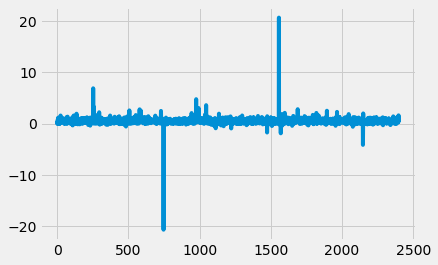

In [111]:
import matplotlib.pyplot as plt
#print(plt.style.available)
plt.style.use(['fivethirtyeight'])
dataframe.reactivity.plot()

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dataframe, title='Pandas Profiling Report', explorative=True)
profile.to_notebook_iframe()
#profile.to_html()

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow import feature_column
from tensorflow.keras import layers
train, test = train_test_split(dataframe, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

104448 train examples
26112 validation examples
32640 test examples


In [27]:
import tensorflow as tf
def df_to_dataset(dataframe, shuffle=True, batch_size=68, target='target'):
  dataframe = dataframe.copy()
  labels = dataframe.pop(target)
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [190]:
batch_size = len(train) # A small batch sized is used for demonstration purposes
target='reactivity'
target='deg_Mg_pH10'
target='deg_Mg_50C'
train_ds = df_to_dataset(train, batch_size=batch_size, target=target)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size, target=target)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size, target=target)

In [169]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  #print('A batch of ages:', feature_batch['Age'])
  print('A batch of targets:', label_batch )

Every feature: ['sequence', 'structure', 'predicted_loop_type', 'reactivity', 'deg_pH10', 'deg_Mg_50C', 'deg_50C', 'bg_pairing_partner', 'pos', 'target']
A batch of targets: tf.Tensor([0.3254 0.     0.6254 ... 0.1401 0.312  0.6944], shape=(104448,), dtype=float64)


In [170]:
#test batches
example_batch = next(iter(train_ds))[0]
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())
print(example_batch)
print(feature_column)

{'sequence': <tf.Tensor: shape=(104448,), dtype=string, numpy=array([b'A', b'A', b'C', ..., b'C', b'G', b'U'], dtype=object)>, 'structure': <tf.Tensor: shape=(104448,), dtype=string, numpy=array([b'.', b'.', b'.', ..., b'(', b')', b')'], dtype=object)>, 'predicted_loop_type': <tf.Tensor: shape=(104448,), dtype=string, numpy=array([b'E', b'E', b'E', ..., b'S', b'S', b'S'], dtype=object)>, 'reactivity': <tf.Tensor: shape=(104448,), dtype=float64, numpy=
array([5.17900e-01, 2.06648e+01, 3.84900e-01, ..., 6.10000e-02,
       2.05300e-01, 2.06000e-02])>, 'deg_pH10': <tf.Tensor: shape=(104448,), dtype=float64, numpy=array([0.3649, 0.    , 0.6656, ..., 0.    , 0.106 , 0.0634])>, 'deg_Mg_50C': <tf.Tensor: shape=(104448,), dtype=float64, numpy=array([0.0925, 0.    , 0.0638, ..., 0.0793, 0.0934, 0.1492])>, 'deg_50C': <tf.Tensor: shape=(104448,), dtype=float64, numpy=array([0.3232, 0.    , 0.2058, ..., 0.0704, 0.4012, 0.1852])>, 'bg_pairing_partner': <tf.Tensor: shape=(104448,), dtype=float64, nu

In [ ]:
pos_count = feature_column.numeric_column('pos')
demo(pos_count)

In [ ]:
pos_buckets = feature_column.bucketized_column(pos_count, boundaries=[1,10,20,30,50,60,70])
demo(pos_buckets)

In [ ]:
bg_pairing_partner_count = feature_column.numeric_column('bg_pairing_partner')
demo(bg_pairing_partner_count)
bg_pairing_partner_buckets = feature_column.bucketized_column(bg_pairing_partner_count, boundaries=[1,10,20,30,50,60,70])
demo(bg_pairing_partner_buckets)

In [37]:
nuc_type = feature_column.categorical_column_with_vocabulary_list('sequence', ['A', 'U', 'G', 'C'])
nuc_type

VocabularyListCategoricalColumn(key='sequence', vocabulary_list=('A', 'U', 'G', 'C'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [38]:
struct_type = feature_column.categorical_column_with_vocabulary_list('structure', ['(', ')', '.'])
struct_type

VocabularyListCategoricalColumn(key='structure', vocabulary_list=('(', ')', '.'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [ ]:
nuc1 = feature_column.categorical_column_with_vocabulary_list('sequence', dataframe.sequence.unique())
nuc1_embedding = feature_column.embedding_column(nuc1, dimension=2)
demo(nuc1_embedding)

In [ ]:
struct1 = feature_column.categorical_column_with_vocabulary_list('structure', dataframe.structure.unique())
struct1_embedding = feature_column.embedding_column(struct1, dimension=2)
demo(struct1_embedding)

In [ ]:
predicted_loop1 = feature_column.categorical_column_with_vocabulary_list('predicted_loop_type', dataframe.predicted_loop_type.unique())
predicted_loop1_embedding = feature_column.embedding_column(predicted_loop1, dimension=2)
demo(predicted_loop1_embedding)

In [ ]:
#crossed_feature_nuc_loop = feature_column.crossed_column([feature_column.indicator_column(pos), feature_column.indicator_column(bg_pairing_partner)], hash_bucket_size=4)
crossed_feature_nuc_loop = feature_column.crossed_column([nuc1, struct1,predicted_loop1], hash_bucket_size=4)
demo(feature_column.indicator_column(crossed_feature_nuc_loop))

In [60]:
feature_columns = []
# numeric cols
for header in ['pos',	'bg_pairing_partner']:
  feature_columns.append(feature_column.numeric_column(header))
feature_columns

[NumericColumn(key='pos', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='bg_pairing_partner', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [61]:
for header in [nuc1_embedding,	struct1_embedding,predicted_loop1_embedding]:
  feature_columns.append((header))
feature_columns

[NumericColumn(key='pos', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='bg_pairing_partner', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 EmbeddingColumn(categorical_column=VocabularyListCategoricalColumn(key='sequence', vocabulary_list=('G', 'A', 'C', 'U'), dtype=tf.string, default_value=-1, num_oov_buckets=0), dimension=2, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x000001B67F5D03A0>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True, use_safe_embedding_lookup=True),
 EmbeddingColumn(categorical_column=VocabularyListCategoricalColumn(key='structure', vocabulary_list=('.', '(', ')'), dtype=tf.string, default_value=-1, num_oov_buckets=0), dimension=2, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x000001B67F5C8F10>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True, use_

In [56]:
for header in [pos_count,	bg_pairing_partner_count]:
  feature_columns.append((header))
feature_columns

[NumericColumn(key='pos', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='bg_pairing_partner', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 EmbeddingColumn(categorical_column=VocabularyListCategoricalColumn(key='sequence', vocabulary_list=('G', 'A', 'C', 'U'), dtype=tf.string, default_value=-1, num_oov_buckets=0), dimension=2, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x000001B67F5D03A0>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True, use_safe_embedding_lookup=True),
 EmbeddingColumn(categorical_column=VocabularyListCategoricalColumn(key='structure', vocabulary_list=('.', '(', ')'), dtype=tf.string, default_value=-1, num_oov_buckets=0), dimension=2, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x000001B67F5C8F10>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True, use_

In [57]:
for header in [pos_buckets,	bg_pairing_partner_buckets]:
  feature_columns.append((header))
feature_columns

[NumericColumn(key='pos', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='bg_pairing_partner', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 EmbeddingColumn(categorical_column=VocabularyListCategoricalColumn(key='sequence', vocabulary_list=('G', 'A', 'C', 'U'), dtype=tf.string, default_value=-1, num_oov_buckets=0), dimension=2, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x000001B67F5D03A0>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True, use_safe_embedding_lookup=True),
 EmbeddingColumn(categorical_column=VocabularyListCategoricalColumn(key='structure', vocabulary_list=('.', '(', ')'), dtype=tf.string, default_value=-1, num_oov_buckets=0), dimension=2, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x000001B67F5C8F10>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True, use_

In [58]:
for header in [nuc1,	struct1, predicted_loop1]:
  feature_columns.append(feature_column.indicator_column(header))
feature_columns

[NumericColumn(key='pos', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='bg_pairing_partner', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 EmbeddingColumn(categorical_column=VocabularyListCategoricalColumn(key='sequence', vocabulary_list=('G', 'A', 'C', 'U'), dtype=tf.string, default_value=-1, num_oov_buckets=0), dimension=2, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x000001B67F5D03A0>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True, use_safe_embedding_lookup=True),
 EmbeddingColumn(categorical_column=VocabularyListCategoricalColumn(key='structure', vocabulary_list=('.', '(', ')'), dtype=tf.string, default_value=-1, num_oov_buckets=0), dimension=2, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x000001B67F5C8F10>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True, use_

In [ ]:
target_column=feature_column.numeric_column('target')

In [ ]:
target_columns = []
# numeric cols
for header in ['reactivity',	'deg_Mg_pH10',	'deg_pH10',	'deg_Mg_50C',	'deg_50C']:
  target_columns.append(feature_column.numeric_column(header))
target_columns

[NumericColumn(key='reactivity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='deg_Mg_pH10', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='deg_pH10', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='deg_Mg_50C', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='deg_50C', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [62]:
#feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
#feature_layer = tf.keras.layers.DenseFeatures([predicted_loop1_embedding,struct1_embedding,nuc1_embedding])
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [205]:
batch_size =  len(train)
target = 'reactivity'
target='deg_Mg_50C'
target = 'deg_Mg_pH10'

train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [206]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(68, activation='relu'),
  #layers.Dropout(.05),
  layers.Dense(68, activation='relu'),
  layers.Dense(1)
])
#model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
model.compile(optimizer='adam',loss=tf.keras.losses.mean_absolute_error,metrics=['accuracy'])
model.fit(train_ds,validation_data=val_ds,epochs=50)

Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
1/1 [==============================] - ETA: 0s - loss: 3.1264 - accuracy: 0.0875WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'sequence': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=string>, 'structure': <tf.Tensor 'ExpandDims_9:0' shape=(None, 1) dtype=string>, 'predicted_loop_type': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=string>, 'reactivity': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=float64>, 'deg_Mg_pH10': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float64>, 'deg_pH10': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=float64>, 'deg_Mg_50C': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=float64>, 'deg_50C': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=float64>, 'bg_pairing_partner': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float64>, 

In [207]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

1/1 [==============================] - 0s 3ms/step - loss: 0.3064 - accuracy: 0.0911
Accuracy 0.0911458358168602


Consider rewriting this model with the Functional API.


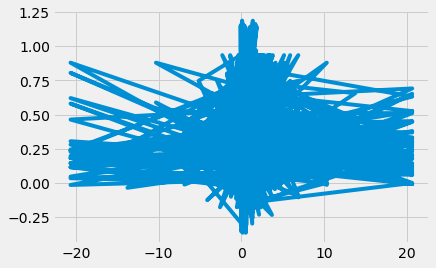

In [186]:
plt.plot(train['reactivity'],model.predict(train_ds).flatten())

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
pred_train = model.predict(train_ds)
print(np.sqrt(mean_squared_error(label_batch,pred_train)))
pred = model.predict(test_ds)
plt.plot(pred_train)
#print(np.sqrt(mean_squared_error(test,pred)))

In [ ]:
  def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(1, 9)),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
def train_model():
  model = create_model()
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  logdir = os.path.join("C:/Users/animeshs/GD/tensorboardlogdir/",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  model.fit(x=x_train, 
            y=y_train, 
            epochs=5, 
            validation_data=(x_test, y_test), 
            callbacks=[tensorboard_callback])
train_model()

In [ ]:
dfTest=pd.read_json(testFile,lines=True)
dfTest.head()

,index,id,sequence,structure,predicted_loop_type,seq_length,seq_scored
0,0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,107,68
1,1,id_000ae4237,GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAU...,.....((((..((((((...(((((.....((((....)))).......,EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIII...,130,91
2,2,id_00131c573,GGAAAACAAAACGGCCUGGAAGACGAAGGAAUUCGGCGCGAAGGCC...,...........((.(((.(.(..((..((..((((...))))..))...,EEEEEEEEEEESSISSSISISIISSIISSIISSSSHHHSSSSIISS...,107,68
3,3,id_00181fd34,GGAAAGGAUCUCUAUCGAAGGAUAGAGAUCGCUCGCGACGGCACGA...,......((((((((((....))))))))))((((((..((.(((.....,EEEEEESSSSSSSSSSHHHHSSSSSSSSSSSSSSSSIISSISSSHH...,107,68
4,4,id_0020473f7,GGAAACCCGCCCGCGCCCGCCCGCGCUGCUGCCGUGCCUCCUCUCC...,.....(((((((((((((((((((((((((((((((((((((((((...,EEEEESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,130,91


In [81]:
#test
test_data = []
dfTest=pd.read_json(testFile,lines=True)
for mol_id in dfTest['id']:
    sample_data = dfTest.loc[dfTest['id'] == mol_id]
    bg, = forgi.load_rna(sample_data['structure'].values[0])
#    for i in range(len(dfTest['sequence'])):
    for i in range(68):
        sample_tuple = (sample_data['id'].values[0]+'_'+str(i), sample_data['sequence'].values[0][i],
                        sample_data['structure'].values[0][i], sample_data['predicted_loop_type'].values[0][i],
                        #sample_data['reactivity'].values[0][i], sample_data['reactivity_error'].values[0][i],
                        #sample_data['deg_Mg_pH10'].values[0][i], sample_data['deg_error_Mg_pH10'].values[0][i],
                        #sample_data['deg_pH10'].values[0][i], sample_data['deg_error_pH10'].values[0][i],
                        #sample_data['deg_Mg_50C'].values[0][i], sample_data['deg_error_Mg_50C'].values[0][i],
                        #sample_data['deg_50C'].values[0][i], sample_data['deg_error_50C'].values[0][i]),
                        bg.pairing_partner(i),(i+1)
                        )
        test_data.append(sample_tuple)
testCSV=pathFiles/'test_data2.csv'
test_data = pd.DataFrame(test_data, columns=['id', 'sequence', 'structure', 'predicted_loop_type','bg_pairing_partner','pos']) #'predicted_loop_type', 'reactivity', 'reactivity_error', 'deg_Mg_pH10', 'deg_error_Mg_pH10','deg_pH10', 'deg_error_pH10', 'deg_Mg_50C', 'deg_error_Mg_50C', 'deg_50C', 'deg_error_50C'])
print(test_data.head())
#print(test_data)
test_data.to_csv(testCSV, index = None)

               id sequence structure predicted_loop_type  bg_pairing_partner  \
0  id_00073f8be_0        G         .                   E                 NaN   
1  id_00073f8be_1        G         .                   E                 NaN   
2  id_00073f8be_2        A         .                   E                 NaN   
3  id_00073f8be_3        A         .                   E                 NaN   
4  id_00073f8be_4        A         .                   E                 NaN   

   pos  
0    1  
1    2  
2    3  
3    4  
4    5  


In [208]:
dataframe=test_data
# Drop un-used columns.
dataframe = dataframe.drop(columns=['id'])#, 'sequence'])#, 'structure', 'predicted_loop_type'])
dataframe[target]=0
dataframe.tail()
dataframe.fillna(0,inplace=True)
dataframe.tail()

,sequence,structure,predicted_loop_type,bg_pairing_partner,pos,deg_Mg_pH10
247107,A,.,I,37.0,64,0
247108,U,.,I,0.0,65,0
247109,U,.,I,0.0,66,0
247110,A,),S,0.0,67,0
247111,U,),S,33.0,68,0


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dataframe, title='Pandas Profiling Report', explorative=True)
profile.to_notebook_iframe()
#profile.to_html()

In [210]:
#testO_ds = df_to_dataset(dataframe, shuffle=False, batch_size=len(dataframe), target=target)

Consider rewriting this model with the Functional API.


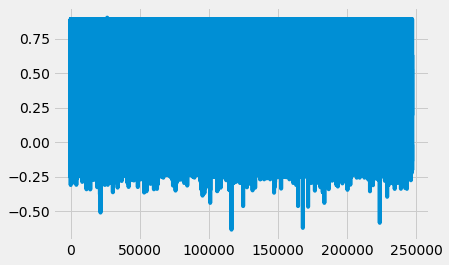

In [211]:
pred_test = model.predict(testO_ds)
#print(np.sqrt(mean_squared_error(label_batch,pred_train)))
plt.plot(pred_test)

In [237]:
testCSV=pathFiles/'test_data2predReactivity.csv'
testCSV=pathFiles/'test_data2preddeg_Mg_50C.csv'
testCSV=pathFiles/'test_data2preddeg_Mg_pH10.csv'
test_data_pred = pd.concat([test_data, pd.DataFrame(pred_test)], axis=1)#DataFrame(test_data, columns=['id', 'sequence', 'structure', 'predicted_loop_type','bg_pairing_partner','pos']) #'predicted_loop_type', 'reactivity', 'reactivity_error', 'deg_Mg_pH10', 'deg_error_Mg_pH10','deg_pH10', 'deg_error_pH10', 'deg_Mg_50C', 'deg_error_Mg_50C', 'deg_50C', 'deg_error_50C'])
print(test_data_pred.head())
test_data_pred.to_csv(testCSV, index = None)

               id sequence structure predicted_loop_type  bg_pairing_partner  \
0  id_00073f8be_0        G         .                   E                 NaN   
1  id_00073f8be_1        G         .                   E                 NaN   
2  id_00073f8be_2        A         .                   E                 NaN   
3  id_00073f8be_3        A         .                   E                 NaN   
4  id_00073f8be_4        A         .                   E                 NaN   

   pos         0  
0    1  0.805392  
1    2  0.804743  
2    3  0.890490  
3    4  0.821674  
4    5  0.722183  


In [246]:
fileName='test_data2pred*.csv'
trainList=list(pathFiles.rglob(fileName))
print(trainList)
import pandas as pd
df=pd.read_csv('C:/Users/animeshs/GD/stanford-covid-vaccine/test_data_pred.csv',low_memory=False,index_col=0)
for f in trainList:
    print(f)
    temp=pd.read_csv(f,low_memory=False,index_col=0)
    temp.rename(columns={'0':f}, inplace=True)
    df=df.merge(temp,left_index=True, right_index=True,how='outer')
print(df.head())
print(df.columns)
testCSV=pathFiles/ 'sample_submission.csv'
df.to_csv(testCSV)

[WindowsPath('C:/Users/animeshs/GD/stanford-covid-vaccine/test_data2preddeg_Mg_50C.csv'), WindowsPath('C:/Users/animeshs/GD/stanford-covid-vaccine/test_data2preddeg_Mg_pH10.csv'), WindowsPath('C:/Users/animeshs/GD/stanford-covid-vaccine/test_data2predReactivity.csv')]
C:\Users\animeshs\GD\stanford-covid-vaccine\test_data2preddeg_Mg_50C.csv
C:\Users\animeshs\GD\stanford-covid-vaccine\test_data2preddeg_Mg_pH10.csv
C:\Users\animeshs\GD\stanford-covid-vaccine\test_data2predReactivity.csv
                  reactivity  deg_Mg_pH10  deg_pH10  deg_Mg_50C  deg_50C  \
id_00073f8be_0           0.0          0.0       0.0         0.0      0.0   
id_00073f8be_1           0.0          0.0       0.0         0.0      0.0   
id_00073f8be_10          0.0          0.0       0.0         0.0      0.0   
id_00073f8be_100         0.0          0.0       0.0         0.0      0.0   
id_00073f8be_101         0.0          0.0       0.0         0.0      0.0   

                 sequence_x structure_x predicted_loop

In [ ]:
!pip install ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
@interact(x=True, y=1.0)
def g(x, y):
    print(x, y)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

In [ ]:
%load_ext google.colab.data_table

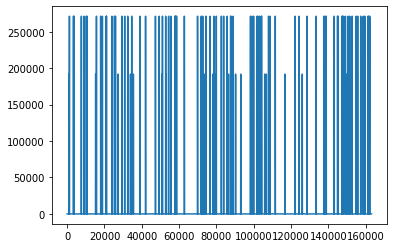

In [ ]:
#!pip install matplotlib
import matplotlib.pyplot as plt
plt.plot(train_data.deg_error_50C)

In [ ]:
!pip install tqdm
from tqdm import tnrange, tqdm_notebook
from time import sleep
for i in tnrange(10, desc='outer loop'):
    for j in tqdm_notebook(range(10), desc=f'loop {i}'):
        sleep(0.3)

C:\Users\animeshs\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  after removing the cwd from sys.path.


C:\Users\animeshs\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [ ]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir tensorboardlogdir (started 0:11:28 ago; pid 14164)


In [ ]:
notebook.display(port=6006, height=1000) 

  Stored in directory: C:\Users\animeshs\AppData\Local\pip\Cache\wheels\5b\c9\6a\2b4247ae9c1b200f64e91a600952bf662bac5b9dcc7d19f6c1
Successfully built forgi


In [ ]:
#https://viennarna.github.io/forgi/graph_tutorial.html
!pip install forgi
import matplotlib.pyplot as plt
import forgi.visual.mplotlib as fvm
import forgi
import forgi.graph.bulge_graph as fgb
bg = fgb.BulgeGraph.from_dotbracket(dfTrain['structure'][1])
#print(bg.to_bg_string())
bg, = forgi.load_rna('(((((((((...((((((.........))))))........((((((.......))))))..)))))))))') #bg.pairing_partner(7) #71
bg, = forgi.load_rna(dfTrain['structure'][1]) #bg.pairing_partner(7) #55
#bg.to_pair_table()
bg.pairing_partner(9)

53

In [ ]:
biggest_stem = (-1, 'x')
for s in bg.stem_iterator():
    if bg.stem_length(s) > biggest_stem[0]:
        biggest_stem = (bg.stem_length(s), s)
print(biggest_stem)

(13, 's0')


In [ ]:
print(bg.get_flanking_sequence('h0')) #hairpin 0
print(bg.get_flanking_sequence('m0')) #multiloop
bg.get_flanking_sequence('i0', side=0)#inner loop lower strand

NNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNN


'NNNNNNNNNNNNNNNNNNNNNNN'

In [ ]:
bg.get_bulge_dimensions('m0')

(2, 1000)

In [ ]:
bg.get_sides('s0', 'i0')

(1, 0)

In [ ]:
import sys
for iloop in bg.iloop_iterator():
  for rn in bg.define_residue_num_iterator(iloop):
    sys.stdout.write(str(rn) + " ")

43 

In [ ]:
print(list(bg.stem_iterator()))

['s0', 's1', 's2', 's3']


In [ ]:
print(list(bg.iloop_iterator()))

['i0']


In [ ]:
bg.get_mst()

{'f0', 'h0', 'h1', 'h2', 'i0', 'm0', 'm1', 's0', 's1', 's2', 's3', 't0'}

In [ ]:
bg.traverse_graph()

[('s0', 'i0', 's1'), ('s0', 'm0', 's2'), ('s2', 'm1', 's3')]

In [ ]:
bg.ss_distance('s0', 's1')

1

In [ ]:
bg0, = forgi.load_rna('(.(.(.(.).(.).).(.).))', dissolve_length_one_stems=False)
print(bg0)#.junctions())

In [ ]:
import forgi
import forgi.graph.bulge_graph as fgb
fx ="""
GAAUUGCGGGAAAGGGGUCAACAGCCGUUCAGUACCAAGUCUCAGGGGAAACUUUGAGAUGGCCUUGCAAAGGGUAUGGUAAUAAGCUGACGGACAUGGUCCUAACCACGCAGCCAAGUCCUAAGUCAACAGAUCUUCUGUUGAUAUGGAUGCAGUUC
....((((((....((.......((((.((((.(((...(((((..........)))))...((.......))....)))......))))))))......))...)).))))......(((....((((((((...))))))))...)))......
"""
nuc_number = 80 # Nucleotide of interest
rna = fgb.BulgeGraph.from_fasta_text(fx)[0]
elems = set()
for i in range(nuc_number-10, nuc_number+11):
    elems.add(rna.get_elem(i))
print(", ".join(sorted(elems)))

h1, i3, m2, s4, s5, s7


In [ ]:
elems=set()
for elem in rna.defines:
    if rna.ss_distance(58, ref_elem)<=10:
        elems.add(elem)
print(", ".join(sorted(elems)))

NameError: ignored

In [ ]:
import tensorflow as tf
import datetime, os

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])
def train_model():
  model = create_model()
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  logdir = os.path.join("C:/Users/animeshs/GD/tensorboardlogdir/",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  model.fit(x=x_train, 
            y=y_train, 
            epochs=5, 
            validation_data=(x_test, y_test), 
            callbacks=[tensorboard_callback])
train_model()

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4940 - accuracy: 0.8234 - val_loss: 0.4382 - val_accuracy: 0.8416
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3827 - accuracy: 0.8597 - val_loss: 0.3972 - val_accuracy: 0.8551
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3491 - accuracy: 0.8707 - val_loss: 0.3592 - val_accuracy: 0.8721
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3292 - accuracy: 0.8774 - val_loss: 0.3484 - val_accuracy: 0.8735
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3133 - accuracy: 0.8832 - val_loss: 0.3510 - val_accuracy: 0.8727


In [ ]:
#https://jeffpollock9.github.io/sample_distributions/
import tensorflow as tf
import tensorflow_probability as tfp
import time as tm
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (12, 8)

tfd = tfp.distributions
tfl = tf.linalg

N = 10_000
P = 20

intercept_true = tfd.Normal(loc=0.666, scale=1.0).sample()
coefficients_true = tfd.Normal(loc=0.0, scale=3.14).sample(P)

x = tfd.Normal(loc=0.0, scale=1.0).sample([N, P])
y = tfd.Bernoulli(intercept_true + tfl.matvec(x, coefficients_true)).sample()

Root = tfd.JointDistributionCoroutine.Root

print(f"tf: {tf.__version__}")
print(f"tfp: {tfp.__version__}")

tf: 2.3.0
tfp: 0.11.0


In [ ]:
def model():
    intercept = yield Root(tfd.Normal(loc=0.0, scale=10.0))
    coefficients = yield Root(
        tfd.MultivariateNormalLinearOperator(scale=tfl.LinearOperatorIdentity(P))
    )
    y = yield tfd.Independent(
        tfd.Bernoulli(intercept[..., tf.newaxis] + tfl.matvec(x, coefficients)),
        reinterpreted_batch_ndims=1,
    )


joint_dist = tfd.JointDistributionCoroutine(model)

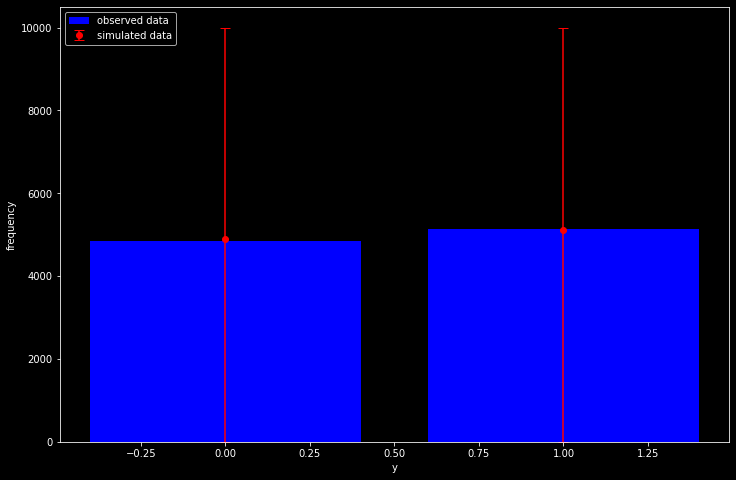

In [ ]:
def plot_ppc(y, y_rep):
    sampled_counts = [np.bincount(sample, minlength=2) for sample in y_rep]
    observed_counts = np.bincount(y)

    sampled_mean = np.mean(sampled_counts, axis=0)
    sampled_quantiles = np.quantile(sampled_counts, q=[0.025, 0.975], axis=0)

    low_error = sampled_mean - sampled_quantiles[0]
    high_error = sampled_quantiles[1] - sampled_mean

    plt.bar(
        x=[0, 1], height=observed_counts, label="observed data", color="blue",
    )

    plt.errorbar(
        x=[0, 1],
        y=sampled_mean,
        yerr=[low_error, high_error],
        fmt="o",
        label="simulated data",
        color="red",
        capsize=5,
    )

    plt.legend(loc="upper left")
    plt.xlabel("y")
    plt.ylabel("frequency")


prior_intercept, prior_cofficients, prior_y = joint_dist.sample(1_000)

plot_ppc(y, prior_y)

In [ ]:
def target_log_prob_fn(*state):
    return joint_dist.log_prob(list(state) + [y])


def trace_fn(states, pkr):
    return (
        pkr.inner_results.target_log_prob,
        pkr.inner_results.leapfrogs_taken,
        pkr.inner_results.has_divergence,
        pkr.inner_results.energy,
        pkr.inner_results.log_accept_ratio,
    )


def step_size_setter_fn(pkr, new_step_size):
    return pkr._replace(step_size=new_step_size)


def step_size_getter_fn(pkr):
    return pkr.step_size


def log_accept_prob_getter_fn(pkr):
    return pkr.log_accept_ratio


num_chains = 6
initial_state = list(joint_dist.sample(num_chains)[:-1])
initial_step_size = [0.1] * len(initial_state)

nuts = tfp.mcmc.NoUTurnSampler(target_log_prob_fn, step_size=initial_step_size)

adaptive_nuts = tfp.mcmc.DualAveragingStepSizeAdaptation(
    inner_kernel=nuts,
    num_adaptation_steps=800,
    target_accept_prob=0.8,
    step_size_setter_fn=step_size_setter_fn,
    step_size_getter_fn=step_size_getter_fn,
    log_accept_prob_getter_fn=log_accept_prob_getter_fn,
)


@tf.function(autograph=False, experimental_compile=True)
def run_mcmc():
    return tfp.mcmc.sample_chain(
        num_results=1_000,
        current_state=initial_state,
        num_burnin_steps=1_000,
        kernel=adaptive_nuts,
        trace_fn=trace_fn,
    )


s = tm.time()
mcmc_samples, mcmc_stats = run_mcmc()
e = tm.time()

print(f"run_mcmc finished in {e - s:.2f} seconds")

run_mcmc finished in 88.09 seconds


In [ ]:
posterior_distributions, posterior_samples = joint_dist.sample_distributions(value=mcmc_samples + [None])
print(f"intercept: {np.allclose(posterior_samples[0], mcmc_samples[0])}")
print(f"coefficients: {np.allclose(posterior_samples[1], mcmc_samples[1])}")

intercept: True
coefficients: True


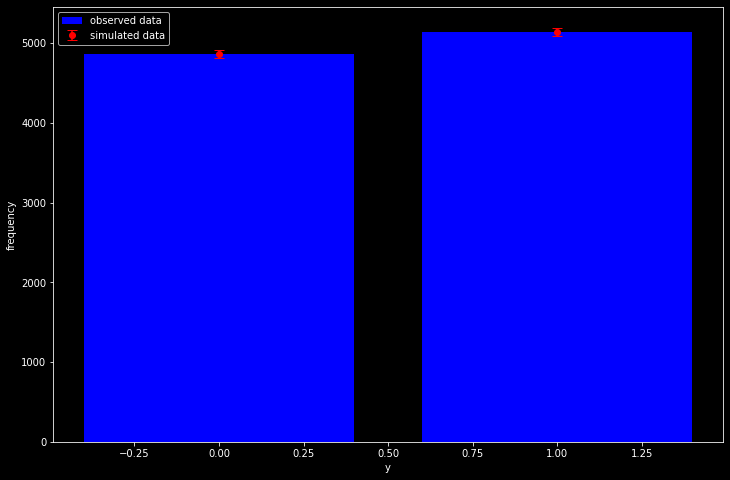

In [ ]:
posterior_y = tf.reshape(posterior_samples[-1], [-1, N])
plot_ppc(y, posterior_y)

In [ ]:
log_lik = posterior_distributions[-1].distribution.log_prob(y)
print(log_lik.shape) # (draws, chains, num_observations)

(1000, 6, 10000)


In [ ]:
dfTrain.head()

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


In [ ]:
#https://github.com/ludvb/xfuse code
#https://doi.org/10.1126/science.aaf2403 data
# Image data
curl -Lo section1.jpg https://www.spatialresearch.org/wp-content/uploads/2016/07/HE_layer1_BC.jpg
curl -Lo section2.jpg https://www.spatialresearch.org/wp-content/uploads/2016/07/HE_layer2_BC.jpg
curl -Lo section3.jpg https://www.spatialresearch.org/wp-content/uploads/2016/07/HE_layer3_BC.jpg
curl -Lo section4.jpg https://www.spatialresearch.org/wp-content/uploads/2016/07/HE_layer4_BC.jpg

# Gene expression count data
curl -Lo section1.tsv https://www.spatialresearch.org/wp-content/uploads/2016/07/Layer1_BC_count_matrix-1.tsv
curl -Lo section2.tsv https://www.spatialresearch.org/wp-content/uploads/2016/07/Layer2_BC_count_matrix-1.tsv
curl -Lo section3.tsv https://www.spatialresearch.org/wp-content/uploads/2016/07/Layer3_BC_count_matrix-1.tsv
curl -Lo section4.tsv https://www.spatialresearch.org/wp-content/uploads/2016/07/Layer4_BC_count_matrix-1.tsv

# Alignment data
curl -Lo section1-alignment.txt https://www.spatialresearch.org/wp-content/uploads/2016/07/Layer1_BC_transformation.txt
curl -Lo section2-alignment.txt https://www.spatialresearch.org/wp-content/uploads/2016/07/Layer2_BC_transformation.txt
curl -Lo section3-alignment.txt https://www.spatialresearch.org/wp-content/uploads/2016/07/Layer3_BC_transformation.txt
curl -Lo section4-alignment.txt https://www.spatialresearch.org/wp-content/uploads/2016/07/Layer4_BC_transformation.txt